In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal


/Users/amroshanshal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
#pip install plotly 

In [2]:
# Step 1: Clean and prepare your data: 

# import training data
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [8]:
# value count of variable 'hotel'
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


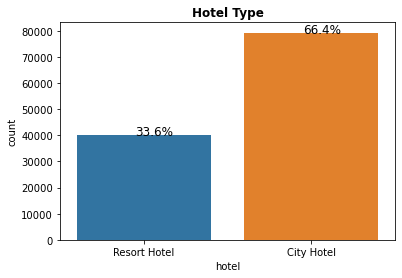

In [9]:
# Create a countplot based on hotel type  
plt.title('Hotel Type', weight='bold')
ax= sns.countplot('hotel', data=df)
without_hue(ax,df['hotel'])

Text(0.5, 1.0, 'Canceled Situation')

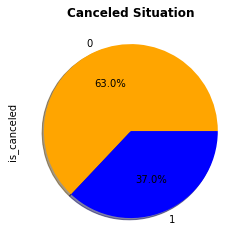

In [10]:
#Create a Piechart based on cancel situation column 
cols = ['orange','blue']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Canceled Situation', weight='bold')

<AxesSubplot:title={'center':'Hotel Type vs Cancelation'}, xlabel='count', ylabel='hotel'>

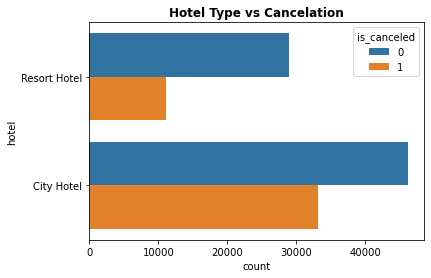

In [11]:
#Create a countplot based on hotel type and cancel situation column
plt.title('Hotel Type vs Cancelation', weight='bold')
sns.countplot(y='hotel', hue='is_canceled', data=df)
 

In [12]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Text(0, 0.5, 'Lead Time')

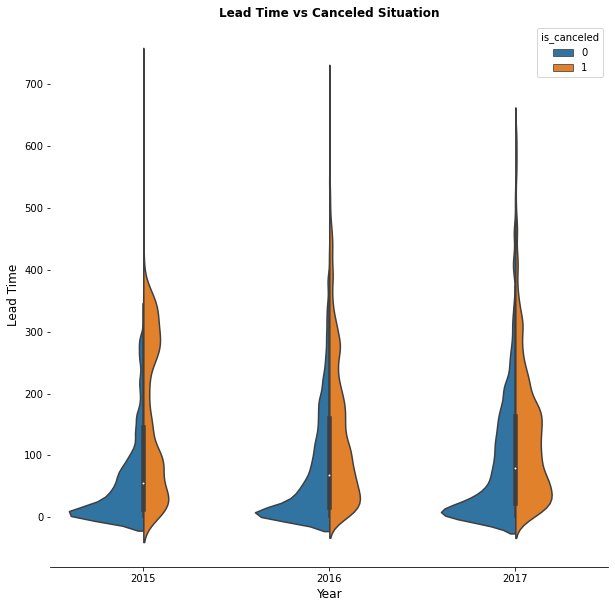

In [13]:
#Arrival Year vs Lead Time vs Canceled Situation
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df,split = True )
sns.despine(left=True)
plt.title('Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [14]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Arrival Month')

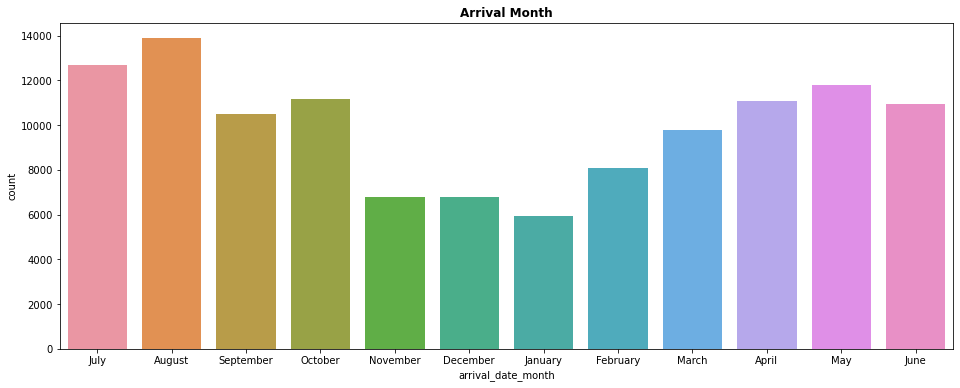

In [15]:
#Create a countplot based on arrival_date_month column
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month',data=df,)
plt.title('Arrival Month', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Arrival Month')

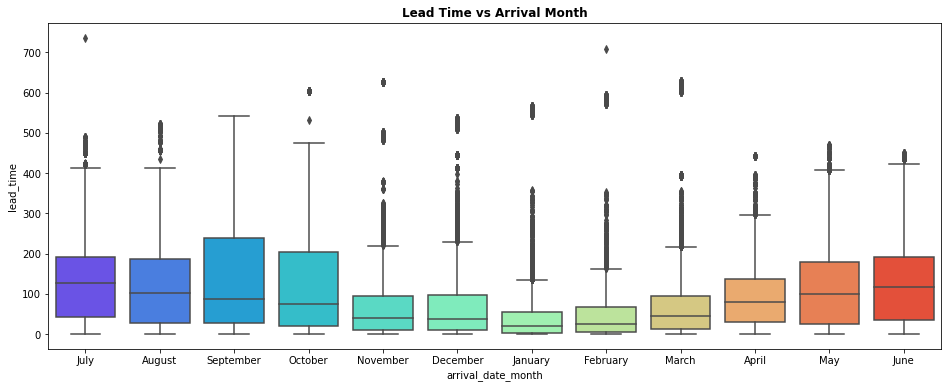

In [16]:
#Create a boxplot based on arrival_date_month and lead_time column
plt.figure(figsize=(16,6))
sns.boxplot(x='arrival_date_month',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Arrival Month', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Canceled Situation ')

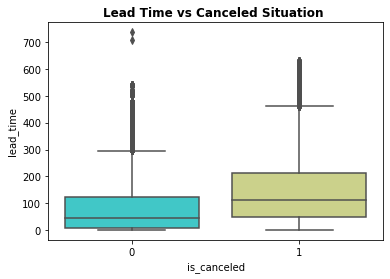

In [17]:
 #Create a boxplot based on Canceled Situation and lead_time column
sns.boxplot(x='is_canceled',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Hotel Type ')

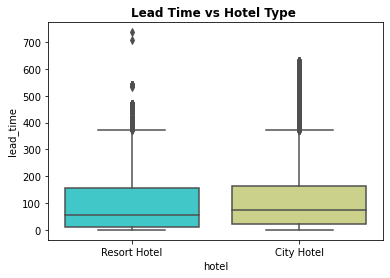

In [18]:
 #Create a boxplot based on hotel type and lead_time column
sns.boxplot(x='hotel',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Hotel Type ', weight='bold')

In [19]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    
    #Create new column month with int value
df['month'] = df['arrival_date_month'].map(d)
 

In [20]:
df.rename(columns={'arrival_date_year': 'year', 
                       'arrival_date_day_of_month': 'day'}, inplace=True)
df['arrival_date'] = pd.to_datetime(df[['year', 'month' , 'day']])

In [21]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='Density'>

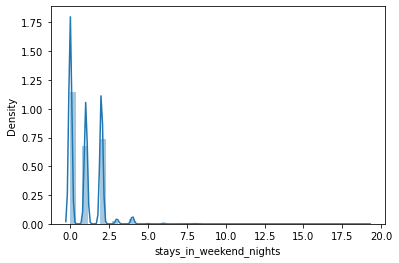

In [22]:
sns.distplot(df['stays_in_weekend_nights'], hist = True)

In [23]:
df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
26        1
32        1
33        1
34        1
35        1
41        1
42        1
50        1
Name: stays_in_week_nights, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_week_nights', ylabel='Density'>

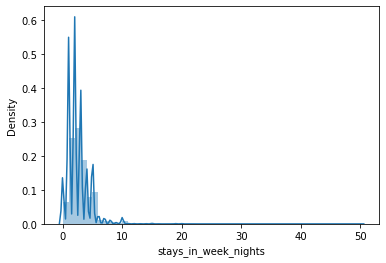

In [24]:
 
sns.distplot(df['stays_in_week_nights'], hist = True)

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


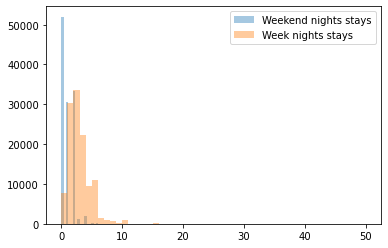

In [25]:

sns.distplot(df['stays_in_weekend_nights'],label="Weekend nights stays",axlabel=False, kde=False)
sns.distplot(df['stays_in_week_nights'],label="Week nights stays",axlabel=False, kde=False)
plt.legend()

In [26]:
df['stays_total']= df['stays_in_week_nights']+df['stays_in_weekend_nights']

<AxesSubplot:xlabel='stays_total', ylabel='Density'>

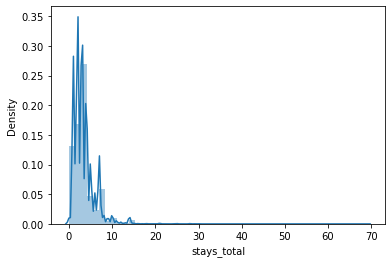

In [27]:
sns.distplot(df['stays_total'], hist = True)

In [28]:
df['stays_total'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays_total, dtype: float64

<AxesSubplot:xlabel='stays_total', ylabel='hotel'>

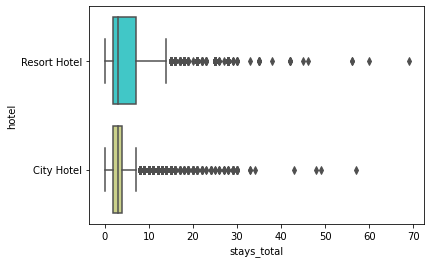

In [29]:
sns.boxplot(x='stays_total',y='hotel',data=df,palette='rainbow')

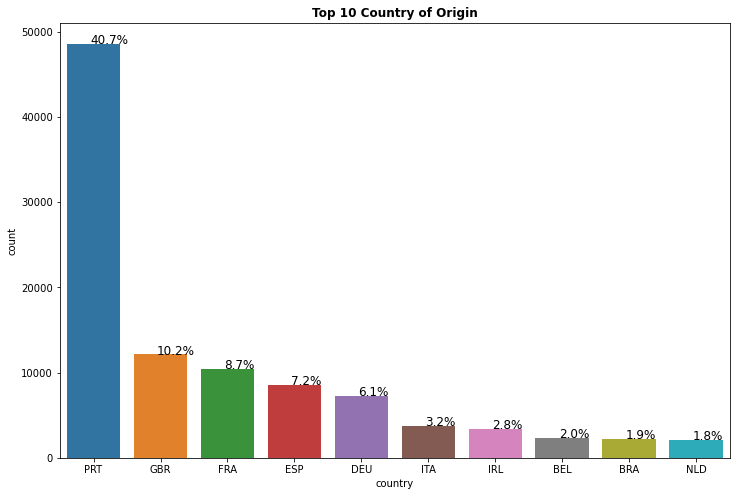

In [30]:
#Create a boxplot based on country column
plt.figure(figsize=(12,8))
plt.title('Top 10 Country of Origin', weight='bold')
ax= sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index)
without_hue(ax,df['country'])


C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Canceled Situation vs Deposit Type ')

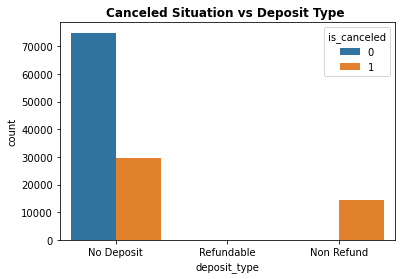

In [31]:
#Create a countplot based on Canceled Situation and Deposit Type column
sns.countplot('deposit_type', hue='is_canceled', data=df)
 
plt.title('Canceled Situation vs Deposit Type ', weight='bold')


C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


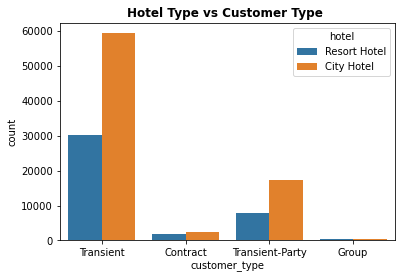

In [32]:
#Create a countplot based on Canceled Situation and Deposit Type column
plt.title('Hotel Type vs Customer Type ', weight='bold')
aw= sns.countplot('customer_type', hue='hotel', data=df,orient = 'v')
with_hue(aw,df['customer_type'],4,2)


<AxesSubplot:ylabel='distribution_channel'>

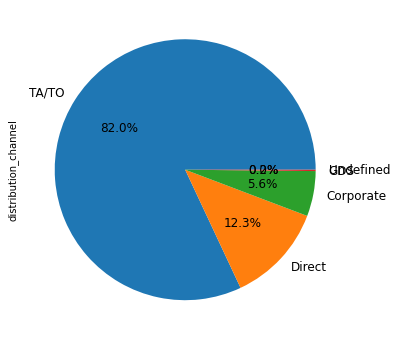

In [33]:
# Create a piechart based on distribution_channel
plt.figure(figsize=(16,6))
df['distribution_channel'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize': 12})

In [34]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


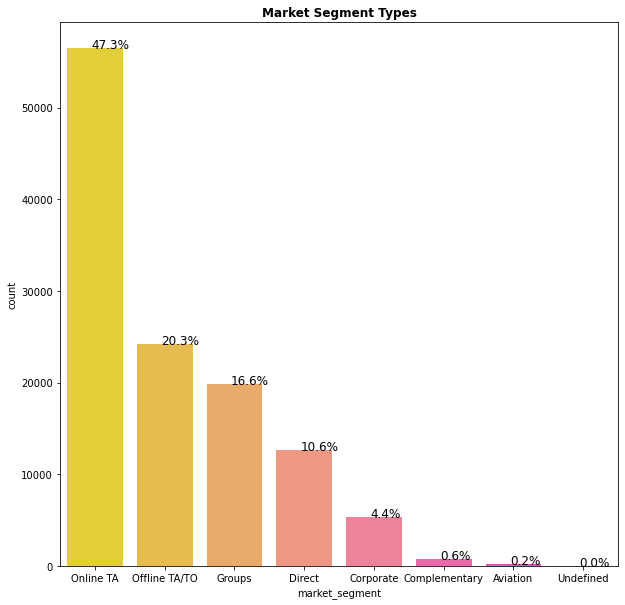

In [35]:
#Create a countplot based on market_segment column

plt.figure(figsize=(10,10))
ax= sns.countplot(df['market_segment'], palette='spring_r', 
              order=pd.value_counts(df['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
without_hue(ax,df['market_segment'])


Text(0.5, 1.0, 'Market Segment Types vs Canceled Situation ')

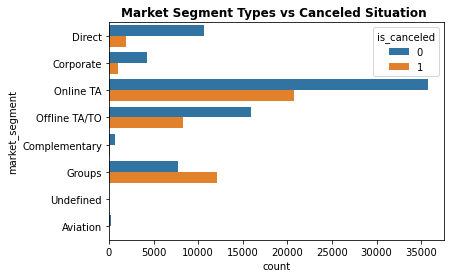

In [36]:
#Create a countplot based on market_segment and is_canceled column
sns.countplot(y='market_segment', hue='is_canceled', data=df)
plt.title('Market Segment Types vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Distribution Channel vs Canceled Situation ')

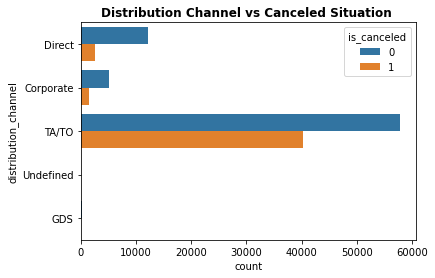

In [37]:
#Create a countplot based on distribution_channel and is_canceled column
sns.countplot(y='distribution_channel', hue='is_canceled', data=df)
plt.title('Distribution Channel vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Market Segment Types')

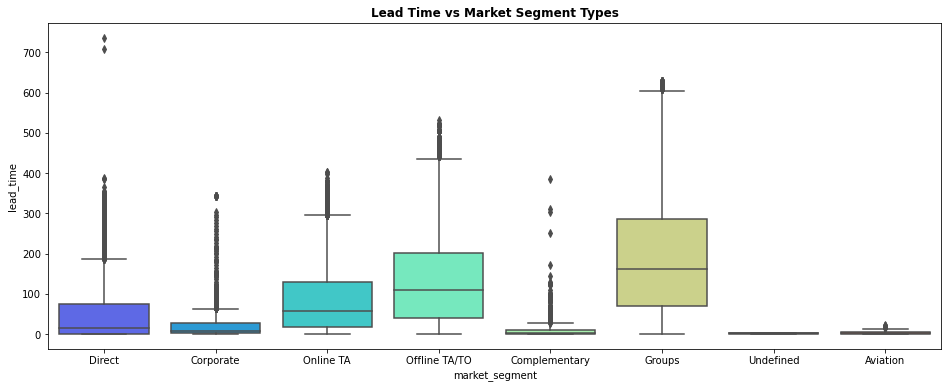

In [38]:
#Create a boxplot based on Market Segment Types and lead_time column

plt.figure(figsize=(16,6))
sns.boxplot(x='market_segment',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Market Segment Types', weight='bold')

In [39]:
df['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [40]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [41]:
df['babies'].value_counts()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [42]:
df['kids']= df['children']+df['babies']

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


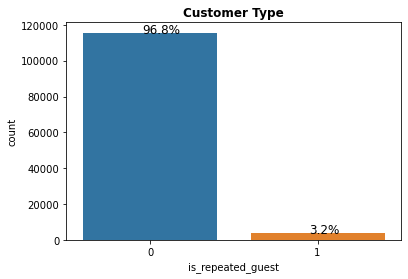

In [43]:
#Create a countplot based on Customer Type column
plt.title('Customer Type', weight='bold')
ax= sns.countplot('is_repeated_guest', data=df)
without_hue(ax,df['is_repeated_guest'])

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


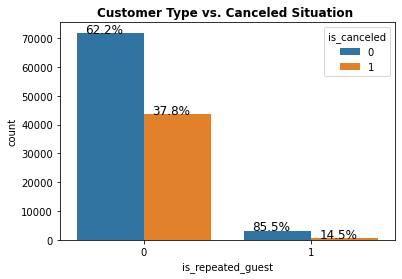

In [44]:
#Create a countplot based on Customer Type and is_cancel column
plt.title('Customer Type vs. Canceled Situation ', weight='bold')
ax=sns.countplot('is_repeated_guest', hue='is_canceled', data=df)
with_hue(ax,df['is_repeated_guest'],2,2)

In [45]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

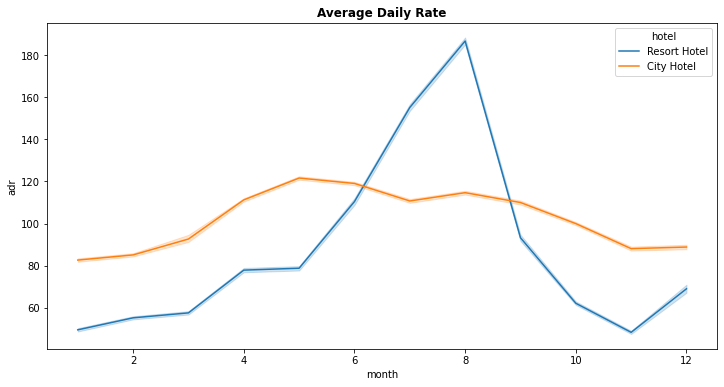

In [46]:
# Average daily rate

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='adr', hue='hotel', data= df)
plt.title('Average Daily Rate', weight='bold')
plt.show()

In [47]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
year                                   0
arrival_date_month                     0
arrival_date_week_number               0
day                                    0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [48]:
#drop column agent and company due to high missing values
df=df.drop(['agent','company'],axis=1)

In [49]:
df=df.drop(['reservation_status'],axis=1)

In [50]:
# filling the missing value
df['children'] =  df['children'].fillna(0)
df['kids'] =  df['kids'].fillna(0)

In [51]:
# drop null value rows of country
df.dropna(subset=['country'],inplace=True)

In [52]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
year                              0
arrival_date_month                0
arrival_date_week_number          0
day                               0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   year                            118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   day                             118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64

In [54]:
#Combine total mumbers by adding kids and adults
df['total_members'] = df['kids'] + df['adults']

In [55]:
#drop column agent and company due to high missing values
df=df.drop(['arrival_date_week_number'],axis=1)

In [56]:
#drop column agent and company due to high missing values
df=df.drop(['arrival_date_month'],axis=1)

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


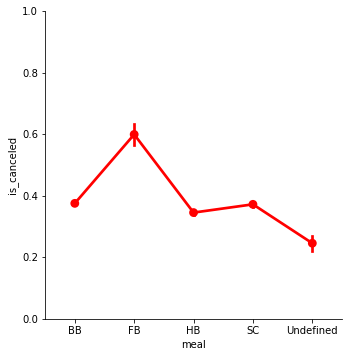

In [57]:
h = sns.PairGrid(data=df, x_vars=['meal'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


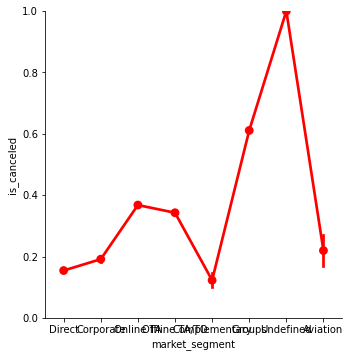

In [58]:
h = sns.PairGrid(data=df, x_vars=['market_segment'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


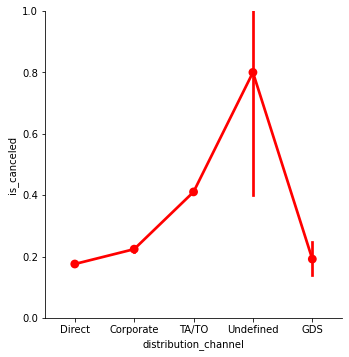

In [59]:
h = sns.PairGrid(data=df, x_vars=['distribution_channel'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


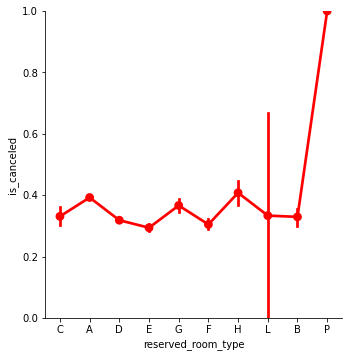

In [60]:
h = sns.PairGrid(data=df, x_vars=['reserved_room_type'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


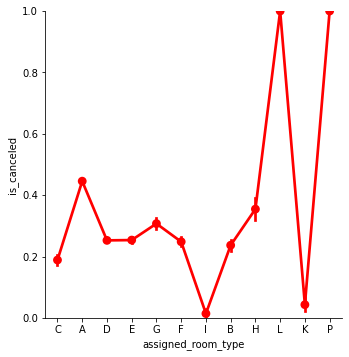

In [61]:
h = sns.PairGrid(data=df, x_vars=['assigned_room_type'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [62]:
# check if assigned room type is same as reserved room type
def same_room_type(x):
    if x['reserved_room_type'] == x['assigned_room_type']:
        return 1
    return 0
df['same_room_type'] = df.apply(same_room_type, axis=1)

In [63]:
#encode hotel column
df['is_cityhotel']=df["hotel"].apply(lambda x: 1 if x== 'City Hotel' else 0)
df= df.drop ('hotel',axis=1)
df.head()

,is_canceled,lead_time,year,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,required_car_parking_spaces,total_of_special_requests,reservation_status_date,month,arrival_date,stays_total,kids,total_members,same_room_type,is_cityhotel
0,0,342,2015,1,0,0,2,0.0,0,BB,...,0,0,2015-07-01,7,2015-07-01,0,0.0,2.0,1,0
1,0,737,2015,1,0,0,2,0.0,0,BB,...,0,0,2015-07-01,7,2015-07-01,0,0.0,2.0,1,0
2,0,7,2015,1,0,1,1,0.0,0,BB,...,0,0,2015-07-02,7,2015-07-01,1,0.0,1.0,0,0
3,0,13,2015,1,0,1,1,0.0,0,BB,...,0,0,2015-07-02,7,2015-07-01,1,0.0,1.0,1,0
4,0,14,2015,1,0,2,2,0.0,0,BB,...,0,1,2015-07-03,7,2015-07-01,2,0.0,2.0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     118902 non-null  int64         
 1   lead_time                       118902 non-null  int64         
 2   year                            118902 non-null  int64         
 3   day                             118902 non-null  int64         
 4   stays_in_weekend_nights         118902 non-null  int64         
 5   stays_in_week_nights            118902 non-null  int64         
 6   adults                          118902 non-null  int64         
 7   children                        118902 non-null  float64       
 8   babies                          118902 non-null  int64         
 9   meal                            118902 non-null  object        
 10  country                         118902 non-null  object 

In [65]:
# encode categorical variables
labelencoder = LabelEncoder()
df['meal'] = labelencoder.fit_transform(df['meal'])
df['market_segment']= labelencoder.fit_transform(df['market_segment'])
df['distribution_channel']= labelencoder.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = labelencoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = labelencoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = labelencoder.fit_transform(df['deposit_type'])
df['customer_type']= labelencoder.fit_transform(df['customer_type'])
df['country']= labelencoder.fit_transform(df['country'])

In [66]:
# encode categorical variable
#df=pd.get_dummies(df, columns=['meal'])
#df=pd.get_dummies(df, columns=['market_segment'])
#df=pd.get_dummies(df, columns=['distribution_channel'])
#df=pd.get_dummies(df, columns=['reserved_room_type'])
#df=pd.get_dummies(df, columns=['assigned_room_type'])
#df=pd.get_dummies(df, columns=['deposit_type'])
#df=pd.get_dummies(df, columns=['customer_type'])
#df=pd.get_dummies(df, columns=['reservation_status'])
#df=pd.get_dummies(df, columns=['country'])


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     118902 non-null  int64         
 1   lead_time                       118902 non-null  int64         
 2   year                            118902 non-null  int64         
 3   day                             118902 non-null  int64         
 4   stays_in_weekend_nights         118902 non-null  int64         
 5   stays_in_week_nights            118902 non-null  int64         
 6   adults                          118902 non-null  int64         
 7   children                        118902 non-null  float64       
 8   babies                          118902 non-null  int64         
 9   meal                            118902 non-null  int32         
 10  country                         118902 non-null  int32  

Text(0.5, 1.0, 'df.corr()')

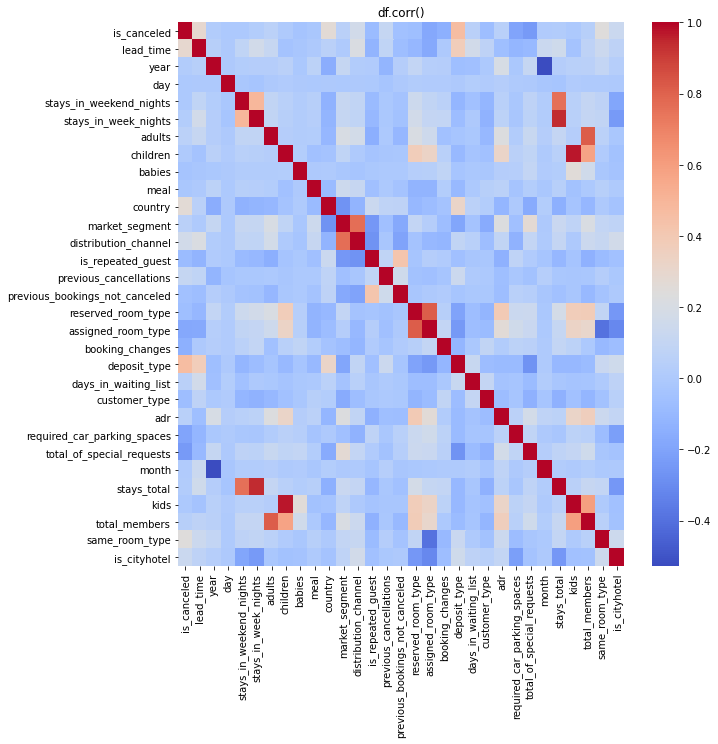

In [68]:
# finding high correlated variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('df.corr()')

In [69]:
# drop distribution channel keep market segment column
df=df.drop(['distribution_channel'],axis=1)

In [70]:
# drop children and babies column, keep kids column
df=df.drop(['children','babies'],axis=1)

In [71]:
# drop stays_in_weekend_nights and stays_in_week_nights column; keep  stays_total 
df=df.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

In [72]:
# drop total members; keep  adults and kids 
df=df.drop(['total_members'],axis=1)

In [73]:
# convert arrival date to day of week, drop arrival date.

import datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek
df=df.drop('arrival_date', axis = 1)

In [74]:
# reservation status date is of little relevance as well, so we will drop that column
df=df.drop('reservation_status_date', axis = 1)

In [75]:
# df_categorical = df[['is_canceled','is_cityhotel','meal',
#                                      'country','market_segment', 
#                                      'is_repeated_guest', 'reserved_room_type',
#                                      'assigned_room_type','deposit_type',
#                                      'customer_type','same_room_type']]


In [76]:
# df_numerical = df.drop(['is_cityhotel','is_canceled','meal',
#                                      'country','market_segment', 
#                                      'is_repeated_guest', 'reserved_room_type',
#                                      'assigned_room_type','deposit_type',
#                                      'customer_type','same_room_type','arrival_date','reservation_status_date'], axis = 1)

In [77]:
df.head()

,is_canceled,lead_time,year,day,adults,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,month,stays_total,kids,same_room_type,is_cityhotel,arrival_day_of_week
0,0,342,2015,1,2,0,135,3,0,0,...,2,0.0,0,0,7,0,0.0,1,0,2
1,0,737,2015,1,2,0,135,3,0,0,...,2,0.0,0,0,7,0,0.0,1,0,2
2,0,7,2015,1,1,0,59,3,0,0,...,2,75.0,0,0,7,1,0.0,0,0,2
3,0,13,2015,1,1,0,59,2,0,0,...,2,75.0,0,0,7,1,0.0,1,0,2
4,0,14,2015,1,2,0,59,6,0,0,...,2,98.0,0,1,7,2,0.0,1,0,2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   year                            118902 non-null  int64  
 3   day                             118902 non-null  int64  
 4   adults                          118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   country                         118902 non-null  int32  
 7   market_segment                  118902 non-null  int32  
 8   is_repeated_guest               118902 non-null  int64  
 9   previous_cancellations          118902 non-null  int64  
 10  previous_bookings_not_canceled  118902 non-null  int64  
 11  reserved_room_type              118902 non-null  int32  
 12  assigned_room_ty

In [79]:
#df.to_csv('Cleaned df.csv')

### Modeling

To start building out the models, we split out the target variable 'is_canceled' with other features. We also divide up data into training (80%) and testing data set (20%) to validate our models. 

In [80]:
X, y = df.drop(['is_canceled'], axis =1), df['is_canceled']

In [81]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118902, dtype: int64

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size = 0.8, test_size =0.2)

#### Decision Tree

One of the model we built is the Decision Tree model from sklearn. To help us identify good parameters for the model, we used the GridSerachCV funciton to help us pick the best comination of the "criteriaon", "max_depth" and "min_samples_leaf" among the range of values we've chosen. We've use the GridSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the last GridSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
dt = DecisionTreeClassifier()

In [85]:
param_map = {
    'criterion':('gini', 'entropy'), 
    "max_depth":[8,9,10,11],
    "min_samples_leaf":[0.01, 0.05,0.1]
}

In [86]:
gs = GridSearchCV(dt, param_map,cv = 5, n_jobs = 4)

In [87]:
gs.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 9, 10, 11],
                         'min_samples_leaf': [0.01, 0.05, 0.1]})

In [88]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 0.01}

After we've decide on the model parameters, we use the DecisionTreeClassifier to fit our training data set. After that, we use the model to predict the label using the features in out testing data set and computed the accuracy score by comparing to the actual labels of the testing data set. In our case, we've obtained an accuracy score of 83%.

In [89]:
#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=10,
                            min_samples_leaf=0.01,
                            random_state=3)
# Fit dt to the training set
dt.fit(train_X, train_y)

# Predict test set labels
y_pred = dt.predict(test_X)
print(y_pred[0:5])

[0 0 0 0 0]


In [90]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of dt: {:.2f}".format(acc))

Test set accuracy of dt: 0.83


To make sure that our model doesn't have overfitting or underfitting issues, we then computed the accuracy score of the trainng data set as well as the cross validation scores. We got a training set accuracy score and cross validaition score of 83%. Since our testing, training and cross validation scores are all the same, it's a good indicator that we don't have overfitting or underfitting problems in our model. 

In [91]:
# Predict the labels of the training set
y_pred_train = dt.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of dt: {:.2f}'.format(acc_train))

Train set accuracy of dt: 0.83


In [92]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [93]:
cv_results = cross_validate(dt, train_X, train_y, cv=5)
cv_results['test_score']

array([0.82775296, 0.82501051, 0.82406434, 0.82748108, 0.82784903])

In [94]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.83'

To take a closer look at the model performance, we print out the Confusion Matrix and the Accuracy, Precision and Recall scores. Precision which is stating that the of the cancelations the model predicted, 80% of them actually cancelled. Recall which is stating that model is 70% sensitive to predict cancellations from guests who actually cancelled. 


In [95]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13215,  1606],
       [ 2466,  6494]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

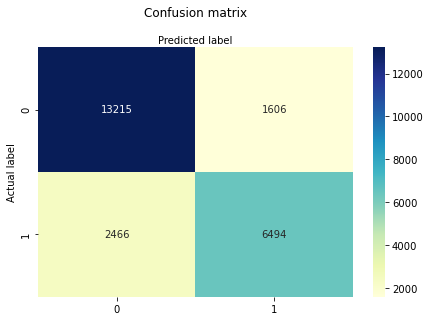

In [96]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8287708674992641
Precision: 0.8017283950617284
Recall: 0.7247767857142857


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

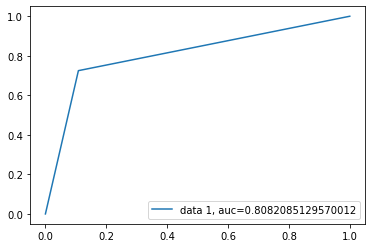

In [98]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

For Decision Tree Models we can also understand the feature imporatnces of all our features. It looks like the most importart feature by large is the deposit_type which agrees our intuition that if a guest put down deposit he or she is less likely to cancel the hotel room. 

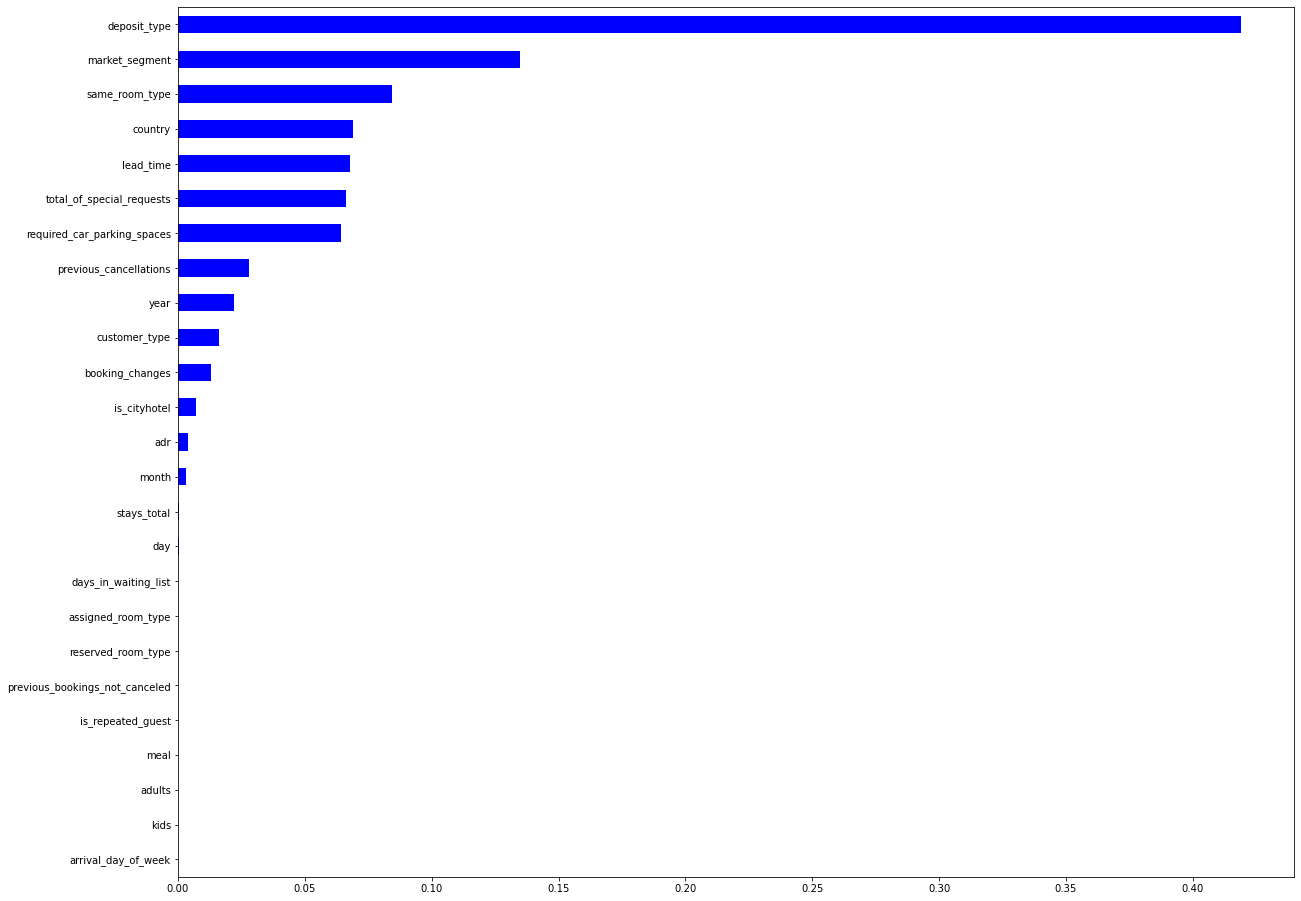

In [99]:
# Create a pd.Series of features importances
importances_dt = pd.Series(dt.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_dt = importances_dt.sort_values()
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

We could also see the nodes and leafs of the Decision Tree to understand the detailed classificaiton steps it took. 

In [100]:
from sklearn.tree import export_text

r = export_text(dt, feature_names=list(X.columns))
print(r)

|--- deposit_type <= 0.50
|   |--- same_room_type <= 0.50
|   |   |--- country <= 134.50
|   |   |   |--- market_segment <= 5.50
|   |   |   |   |--- lead_time <= 98.50
|   |   |   |   |   |--- market_segment <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- market_segment >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  98.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- market_segment >  5.50
|   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |--- class: 0
|   |   |--- country >  134.50
|   |   |   |--- lead_time <= 69.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- adr <= 45.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- adr >  45.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- lead_time >  69.5

#### Random Forest

Another model we built is the Random Forest model from sklearn. To help us identify good parameters for the model, we used the GridSerachCV function to help us pick the best comination of the "max_depth" and "min_samples_leaf" among the range of values we've chosen. We've use the GridSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the last GridSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [102]:
param_map = {
    "max_depth":[9,10,11],
    "min_samples_leaf":[0.01,0.05,0.1]
}

In [103]:
gs = GridSearchCV(rf, param_map,cv = 5, n_jobs = 4)

In [104]:
gs.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [9, 10, 11],
                         'min_samples_leaf': [0.01, 0.05, 0.1]})

In [105]:
gs.best_params_

{'max_depth': 11, 'min_samples_leaf': 0.01}

After we've decide on the model parameters, we use the RandomForestClassifier to fit our training data set. After that, we use the model to predict the label using the features in out testing data set and computed the accuracy score by comparing to the actual labels of the testing data set. In our case, we've obtained an accuracy score of 83%.

To make sure that our model doesn't have overfitting or underfitting issues, we then computed the accuracy score of the trainng data set as well as the cross validation scores. We got a training set accuracy score of 82% and cross validaition score of 82%. Since our testing, training and cross validation scores are the same, it's a good indicator that we don't have overfitting or underfitting problems in our model. 

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestClassifier(n_estimators=400,
                            max_depth= 11,
                            min_samples_leaf=0.01,
                            random_state=SEED)

# Fit 'rf' to the training set
rf.fit(train_X, train_y)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_X)
y_pred_train=rf.predict(train_X)

# Evaluate the test set RMSE
acc_test = accuracy_score(test_y, y_pred)
acc_train = accuracy_score(train_y, y_pred_train)

# Print the test set RMSE
print('Test set accuracy of rf: {:.2f}'.format(acc_test))
print('Train set accuracy of rf: {:.2f}'.format(acc_train))

Test set accuracy of rf: 0.83
Train set accuracy of rf: 0.82


In [107]:
cv_results = cross_validate(rf, train_X, train_y, cv=5)
cv_results['test_score']

array([0.82281209, 0.82527334, 0.82296047, 0.82637721, 0.81954373])

In [108]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.82'

To take a closer look at the model performance, we print out the Confusion Matrix and the Accuracy, Precision and Recall scores. Precision which is stating that the of the cancelations the model predicted, 88% of them actually cancelled. Recall which is stating that model is 60% sensitive to predict cancellations from guests who actually cancelled. While the Precision score of the Random Forest is higher than the Decision Tree, the Recall score is lower.


In [109]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[14137,   684],
       [ 3446,  5514]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

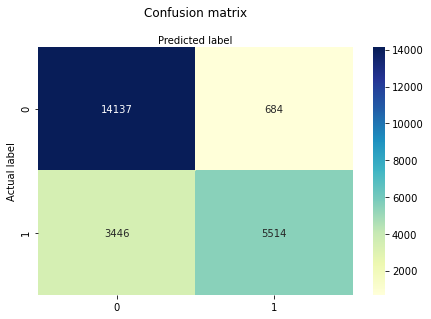

In [110]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8263319456709137
Precision: 0.8896418199419167
Recall: 0.6154017857142857


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

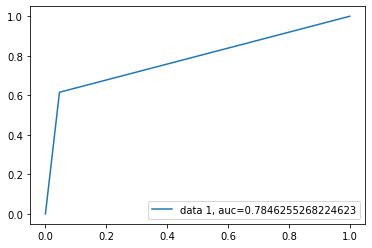

In [112]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

For RandomForest Models we can also understand the feature imporatnces of all our features. It looks like the most importart feature by large is the deposit_type which agrees our intuition that if a guest put down deposit he or she is less likely to cancel the hotel room. 

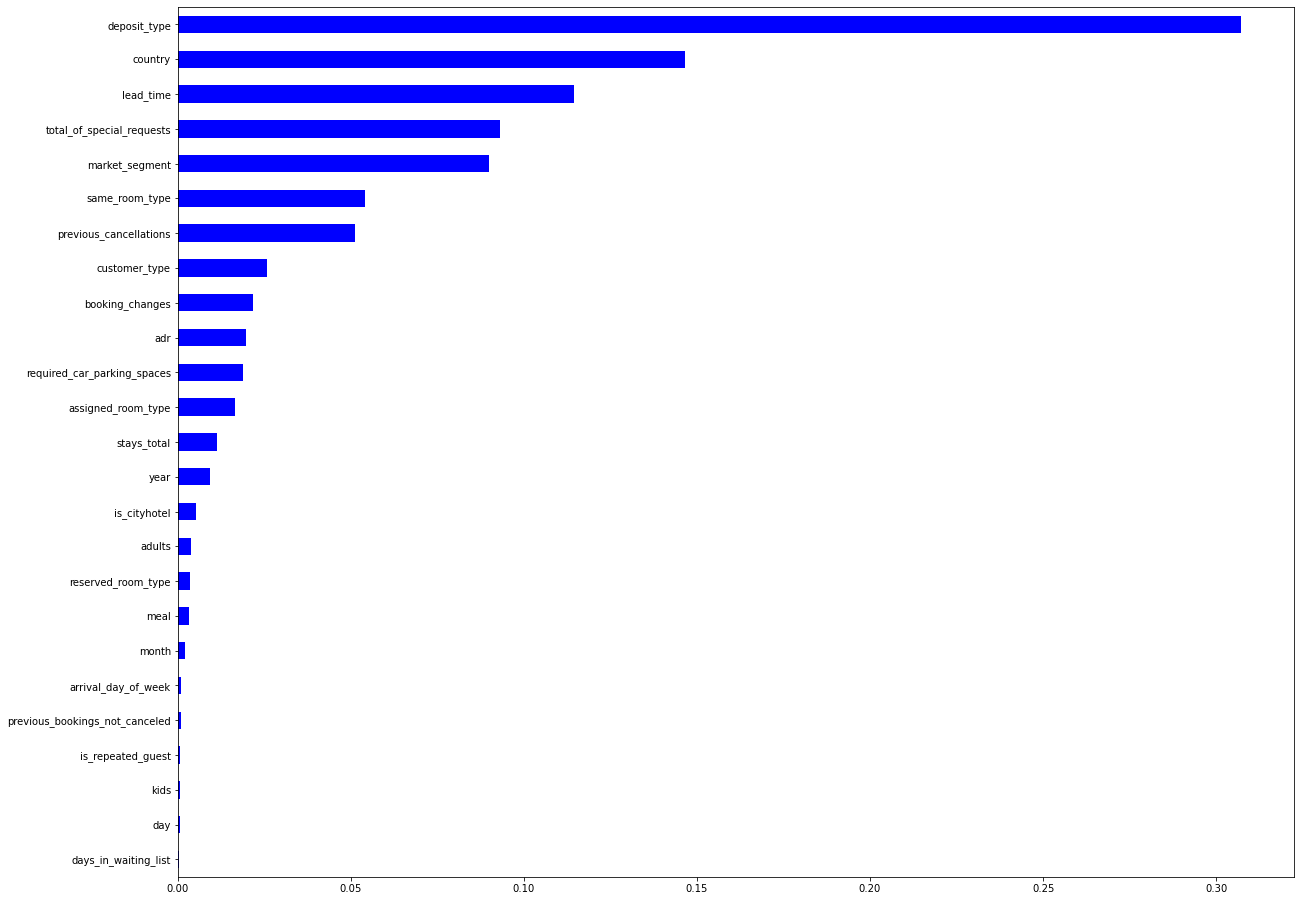

In [113]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

### Logistics Regression

In [114]:
from sklearn.linear_model import LogisticRegression

logReg=LogisticRegression(solver='lbfgs', max_iter=5000)

logReg.fit(train_X, train_y)

y_pred = logReg.predict(test_X)


Increased max_iter because there was a convergance warning.

In [115]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = logReg.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of Log: {:.2f}".format(acc))

Test set accuracy of Log: 0.79


In [116]:
# Predict the labels of the training set
y_pred_train = logReg.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of Log: {:.2f}'.format(acc_train))

Train set accuracy of Log: 0.79


In [117]:
import warnings
warnings.filterwarnings("ignore")
cv_results = cross_validate(logReg, train_X, train_y, cv=5)
cv_results['test_score']

array([0.79406045, 0.78863541, 0.79231497, 0.79578427, 0.79278806])

In [118]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.79'

In [119]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13691,  1130],
       [ 3782,  5178]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

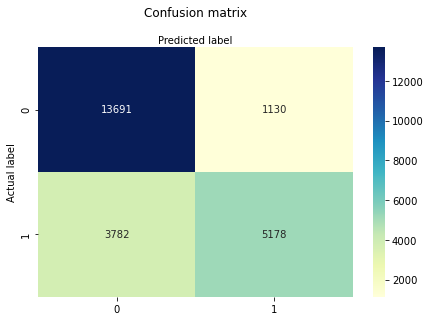

In [120]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [121]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.7934485513645347
Precision: 0.8208623969562461
Recall: 0.5779017857142857


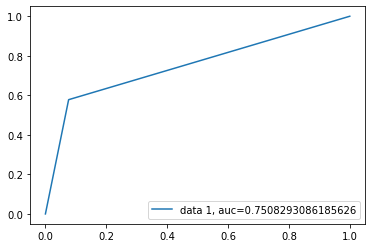

In [122]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [123]:
Log_importance = logReg.coef_[0]
Log_importance

array([ 2.84605348e-03, -3.20238159e-03, -7.33378039e-04,  1.34966394e-01,
       -1.91874225e-02,  1.09498898e-02,  4.32191362e-01, -4.94776077e-01,
        2.30270378e+00, -3.32892382e-01,  1.71164284e-02, -4.70844293e-02,
       -3.66785411e-01,  4.27721864e+00, -3.70208374e-03, -7.85848319e-02,
        5.57446281e-03, -3.70822082e+00, -5.85938412e-01, -1.64947923e-02,
        3.95037787e-02,  1.55423378e-01,  1.89395612e+00,  7.47914093e-02,
        1.98826480e-02])

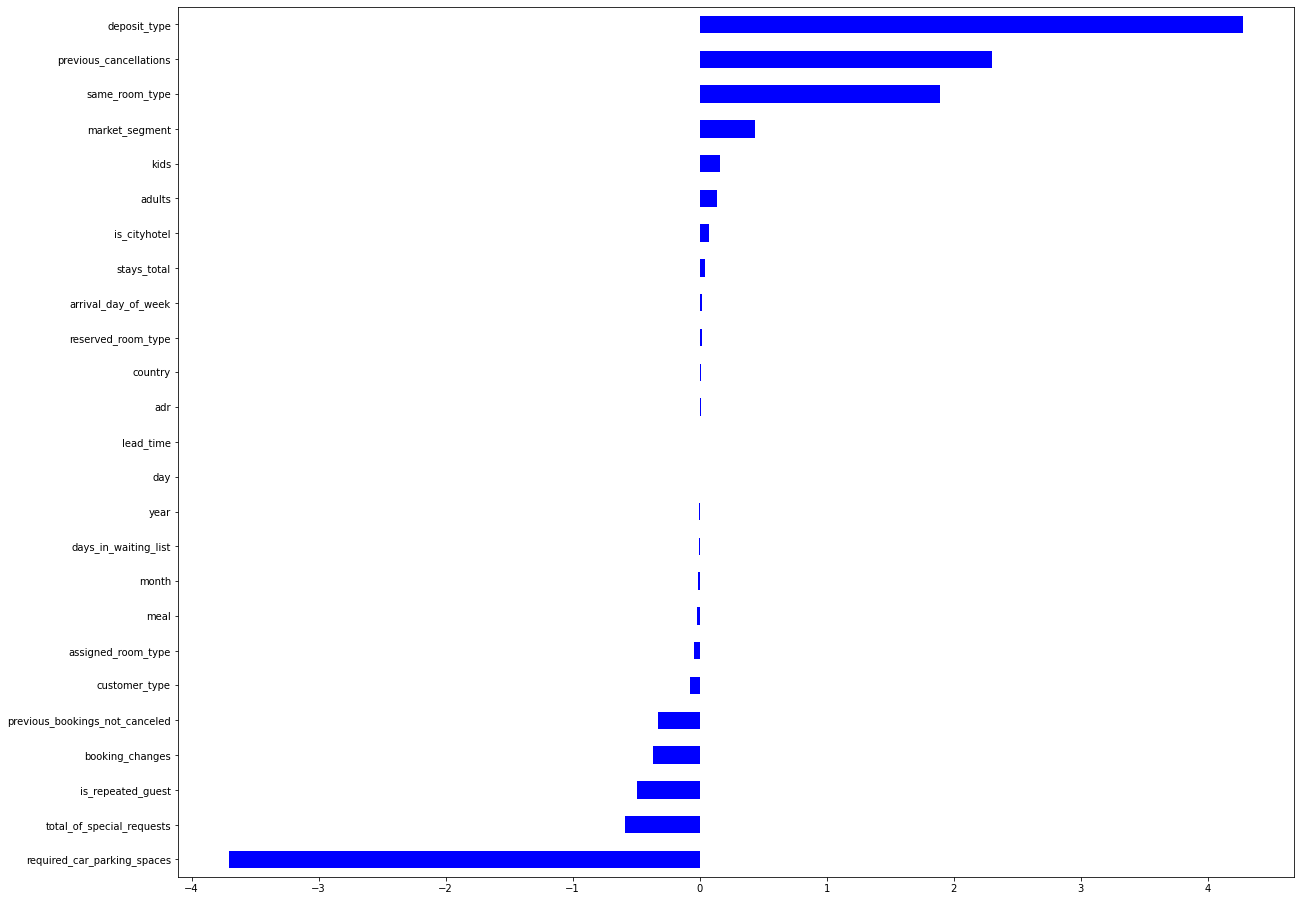

In [124]:
# Create a pd.Series of features importances
importances_log = pd.Series(Log_importance,
index = X.columns)
# Sort importances
sorted_importances_log = importances_log.sort_values()
# Make a horizontal bar plot
sorted_importances_log.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

Logistics Regression is an easy model to implement, doesn’t require too many computational resources and any tuning. However, there are some questionable results from the model based on the coefficients importance selection. There are many features (like repeat guests and previous booking not cancelled) that seem important for accurately predicting cancellations are coming out as negative features. In hypothetical scenario where if we were just modeling with Logistics Regression, one option is to drop the negative features and rerun the model. However, we would end up with few features in our model which would create a poor fit. Logistics Regressions has multiple setbacks, especially for our hotel cancellations predictions project.

First, Logistic Regression requires moderate or no multicollinearity between our features (independent variables). Second, on high dimensional datasets, which is likely the case in real world application of our project, this may lead to the model being over-fit on the training set, which means overstating the accuracy of predictions on the training set and thus the model may not be able to predict accurate results on the test set. 

Overall, the model doesn't seem satisfactory which is why we have to try other options like CatBoost.

### CatBoost 

An alternative model to use instead is CatBoost. CatBoost is model that is based on gradient boosted decision trees. A set of decision trees is built consecutively during training where each successive tree is built with reduced loss compared to the previous trees.

Before the models go into the learning phase, the models create feature-split pairs for all features. Catboost uses Minimal Variance Sampling (MVS) for splits where weighted sampling happens in the tree-level and not in the split level. The observations for each boosting tree are sampled in a way that maximizes the accuracy of split scoring. This makes CatBoost faster than a model like XGBoost where there is no weighted sampling technique.

With regards to leaf growth, Catboost grows a balanced tree. In each level of the tree, the feature-split pair that brings to the smallest loss is selected and is used for all the level’s nodes. Another thing to keep in mind is that CatBoost has automatic categorical feature handling where it uses a combination of one-hot encoding and an advanced mean encoding. However, we didn't utilize this feature here because we already used an encoder for our data.

In [125]:
#conda config --add channels conda-forge

In [126]:
#conda install catboost

In [127]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier()
model_cb.fit(train_X, train_y)

Learning rate set to 0.072054
0:	learn: 0.6320563	total: 184ms	remaining: 3m 3s
1:	learn: 0.5856025	total: 202ms	remaining: 1m 40s
2:	learn: 0.5504108	total: 221ms	remaining: 1m 13s
3:	learn: 0.5146995	total: 237ms	remaining: 58.9s
4:	learn: 0.4924844	total: 252ms	remaining: 50.2s
5:	learn: 0.4697254	total: 267ms	remaining: 44.3s
6:	learn: 0.4540328	total: 282ms	remaining: 40.1s
7:	learn: 0.4406437	total: 297ms	remaining: 36.9s
8:	learn: 0.4319907	total: 314ms	remaining: 34.5s
9:	learn: 0.4231036	total: 329ms	remaining: 32.6s
10:	learn: 0.4147825	total: 344ms	remaining: 30.9s
11:	learn: 0.4085145	total: 359ms	remaining: 29.6s
12:	learn: 0.4021278	total: 374ms	remaining: 28.4s
13:	learn: 0.3972557	total: 389ms	remaining: 27.4s
14:	learn: 0.3922168	total: 407ms	remaining: 26.7s
15:	learn: 0.3884865	total: 425ms	remaining: 26.1s
16:	learn: 0.3838608	total: 441ms	remaining: 25.5s
17:	learn: 0.3793035	total: 457ms	remaining: 24.9s
18:	learn: 0.3767726	total: 472ms	remaining: 24.3s
19:	learn

In [128]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = model_cb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of CatBoost: {:.2f}".format(acc))

Test set accuracy of CatBoost: 0.88


In [129]:
# Predict the labels of the training set
y_pred_train = model_cb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of CatBoost: {:.2f}'.format(acc_train))

Train set accuracy of CatBoost: 0.89


In [130]:
cv_results = cross_validate(model_cb, train_X, train_y, cv=5)
cv_results['test_score']

Learning rate set to 0.065505
0:	learn: 0.6368837	total: 14.5ms	remaining: 14.5s
1:	learn: 0.5932245	total: 28.6ms	remaining: 14.3s
2:	learn: 0.5585135	total: 42.6ms	remaining: 14.2s
3:	learn: 0.5244225	total: 55.9ms	remaining: 13.9s
4:	learn: 0.5024378	total: 69.7ms	remaining: 13.9s
5:	learn: 0.4800259	total: 88.1ms	remaining: 14.6s
6:	learn: 0.4634408	total: 106ms	remaining: 15s
7:	learn: 0.4499891	total: 120ms	remaining: 14.9s
8:	learn: 0.4410185	total: 139ms	remaining: 15.3s
9:	learn: 0.4313050	total: 155ms	remaining: 15.3s
10:	learn: 0.4231698	total: 169ms	remaining: 15.2s
11:	learn: 0.4160902	total: 182ms	remaining: 15s
12:	learn: 0.4093593	total: 198ms	remaining: 15s
13:	learn: 0.4026993	total: 216ms	remaining: 15.2s
14:	learn: 0.3973888	total: 230ms	remaining: 15.1s
15:	learn: 0.3934449	total: 244ms	remaining: 15s
16:	learn: 0.3896576	total: 258ms	remaining: 14.9s
17:	learn: 0.3858566	total: 272ms	remaining: 14.8s
18:	learn: 0.3830154	total: 285ms	remaining: 14.7s
19:	learn: 0.

array([0.87742444, 0.8727397 , 0.8739487 , 0.87326535, 0.87594617])

In [131]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.87'

#### I didn't find it necessary to use GridSearchCV to find hyperparameters because the difference between CV, train and test accuracy is very small that I don't believe it calls for overfitting. If there was notable overfitting in the model, I would have ran GridSearchCV to tune the parameters to reduce the overfitting.

In [132]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13712,  1109],
       [ 1788,  7172]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

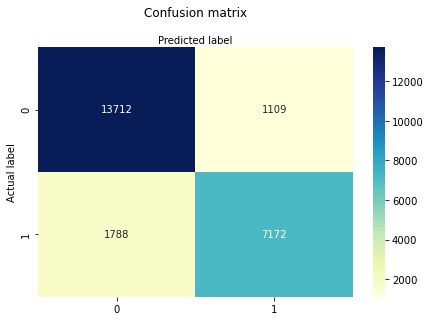

In [133]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [134]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8781800597115345
Precision: 0.8660789759690859
Recall: 0.8004464285714286


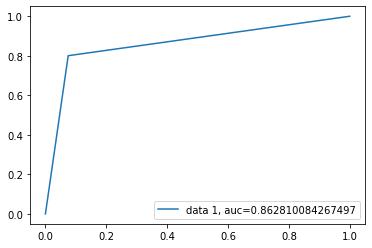

In [135]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has AUC near to the 0 which means it has the worst measure of separability. In this case, the AUC is 0.86 which is relatively high.

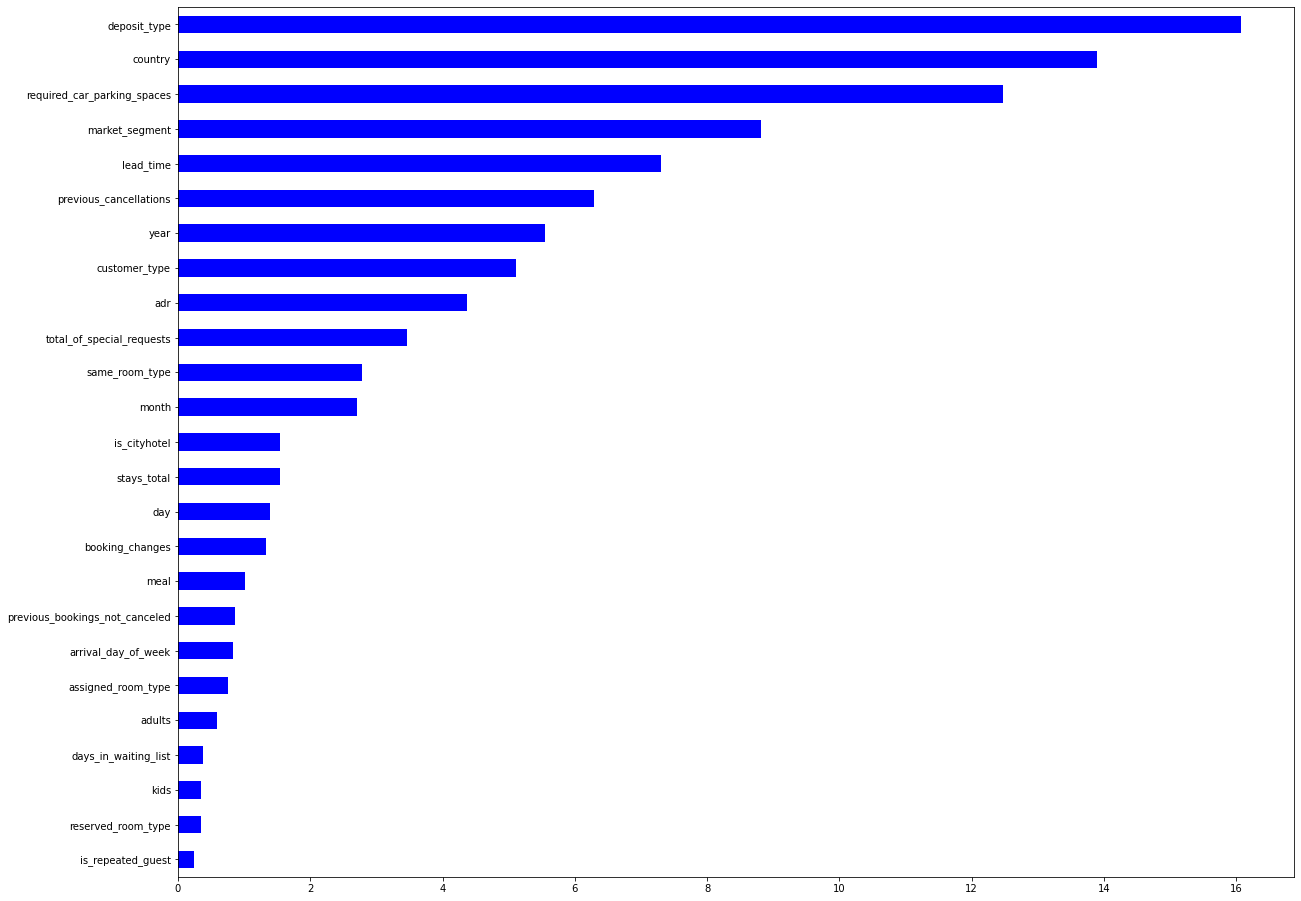

In [136]:
# Create a pd.Series of features importances
importances_rf = pd.Series(model_cb.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

We can see from the feature importance plot that deposit type and country are the two most important features. We got similar results from other models. A better option than just an importance feature plot is SHAP value plot.

### SHAP Value Plot

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable. What SHAP does is quantifying the contribution that each feature brings to the prediction made by the model. The difference between importance features and SHAP value plot is that SHAP not only shows the important features, but also shows the positive or negative impact for each variable on the target variable.

In [137]:
#conda install -c conda-forge shap

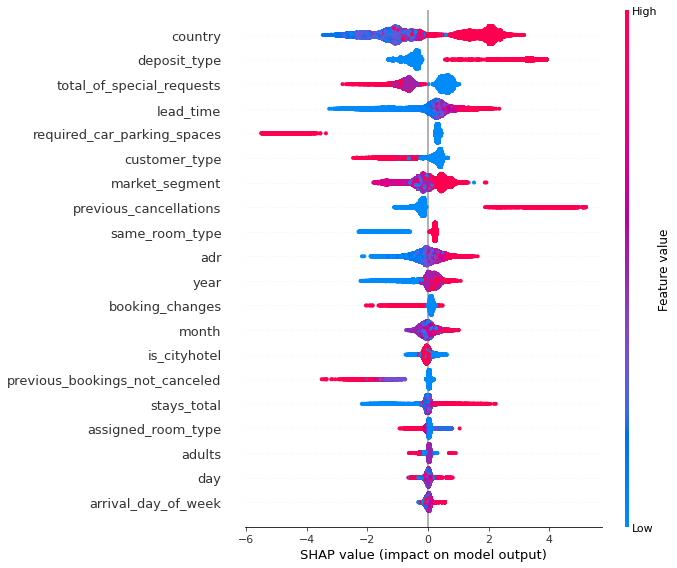

In [138]:
import shap
shap_values = shap.TreeExplainer(model_cb).shap_values(train_X)
shap.summary_plot(shap_values, train_X)

The country of origin of the person who made the reservation has a high impact on cancellations. We see that if a specific country's value is high then there's high probability of reservation being cancelled. Depending on the country, the chances of a reservation being cancelled is the highest among other features. We did see in EDA that Portugal has a high number of reservations, so many of these values could be from Portugal. However, this result has to be interpreted with caution because in real life, we don't always have the nationality of the person until they check in to the hotel. In addition, there is a possibility that hotels use default values for the country if that is not provided. Thus, this can cause an impact on the model because we'd be modeling with inaccurate data.

Other important observations from this plot include total special requests. We see that when a Client does not make any special request the higher the probability that the customer will cancel. In addition, we also see that the higher the number of previous cancellations, the more likely is a customer to cancel a reservation (we can see the opposite with previous cancellations). Finally, the lower the lead time the lower the probability that a customer cancels their reservation.

The same concept applies for other features. One thing that can be done to improve the visualization of the country feature is to model around the data of one country such as Portugal and see what the outcome would be for the plot. 

### Gradient Boost

In [139]:
#conda install -c anaconda py-xgboost

Another model we built is Gradient Boost from sklearn. Gradient Boost is widely used in the data science world. To help us identify the best parameters for the model, we used the RandomizedSearchCV funciton to help us pick the best comination of 'max_depth', 'max_features','n_estimators', 'min_samples_split', 'min_samples_leaf', and 'learning_rate' among the lists of values we've chosen. We used the RandomizedSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the lastest RandomizedSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [141]:
# Number of features to consider at every split
n_estimators = [int(x) for x in np.linspace(10, 30, num = 1)]

# learning rate options
learning_rate = [0.1,0.01,1,0.5]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num = 20)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 20)]

# Maximum of features
max_features = [int(x) for x in np.linspace(1, 15, num = 15)]

# Maximum depth of a tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

# Create the GB grid
gb_grid = {'n_estimators': n_estimators,
           'learning_rate': learning_rate,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'max_depth': max_depth}

# Use the gb grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingClassifier()

# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_grid, n_iter = 100, cv = 5, verbose=0,scoring='accuracy',
random_state=SEED, n_jobs = -1)

# Fit the random search model
gb_random.fit(train_X, train_y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 0.5],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'min_samples_split': [2, 2, 3, 4, 5, 6,
                                                        

In [142]:
gb_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_features': 13,
 'max_depth': 10,
 'learning_rate': 0.5}

In [143]:
#Fit GB Classifer
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=.5, min_samples_split=12,
                               min_samples_leaf=4, max_features=13, max_depth=10, random_state=SEED)

# using best parameters when scoring = recall
#gb = GradientBoostingClassifier(n_estimators=10, learning_rate=.1, min_samples_split=8,
#                                min_samples_leaf=16, max_features=15, max_depth=10, random_state=SEED)

gb.fit(train_X,train_y)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=13,
                           min_samples_leaf=4, min_samples_split=12,
                           n_estimators=10, random_state=1)

In [144]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred_gb = gb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred_gb)
print("Test set accuracy of GBM: {:.5f}".format(acc))

Test set accuracy of GBM: 0.86603


In [145]:
# Predict the labels of the training set
y_pred_train_gb = gb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train_gb)

# Print RMSE_train
print('Train set accuracy of GBM: {:.5f}'.format(acc_train))

Train set accuracy of GBM: 0.88077


In [146]:
# calculate CV accuracy score
Accuracy_CV_scores = cross_val_score(gb, train_X, train_y, cv=5,
                                     scoring='accuracy',
                                     n_jobs=-1)

print("GBM Accuracy score (CV): {0:.5f}".format(Accuracy_CV_scores.mean()))

GBM Accuracy score (CV): 0.86515


In [147]:
# print the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred_gb)
cnf_matrix

array([[13588,  1233],
       [ 1953,  7007]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

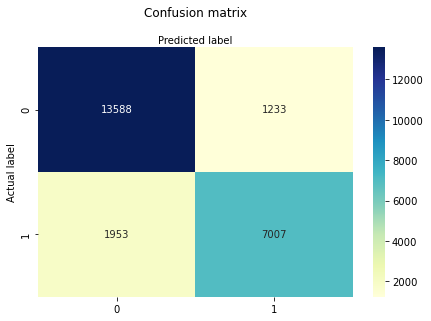

In [148]:
# plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_gb))
print("Precision:",metrics.precision_score(test_y, y_pred_gb))
print("Recall:",metrics.recall_score(test_y, y_pred_gb))

Accuracy: 0.8660275009461335
Precision: 0.850364077669903
Recall: 0.78203125


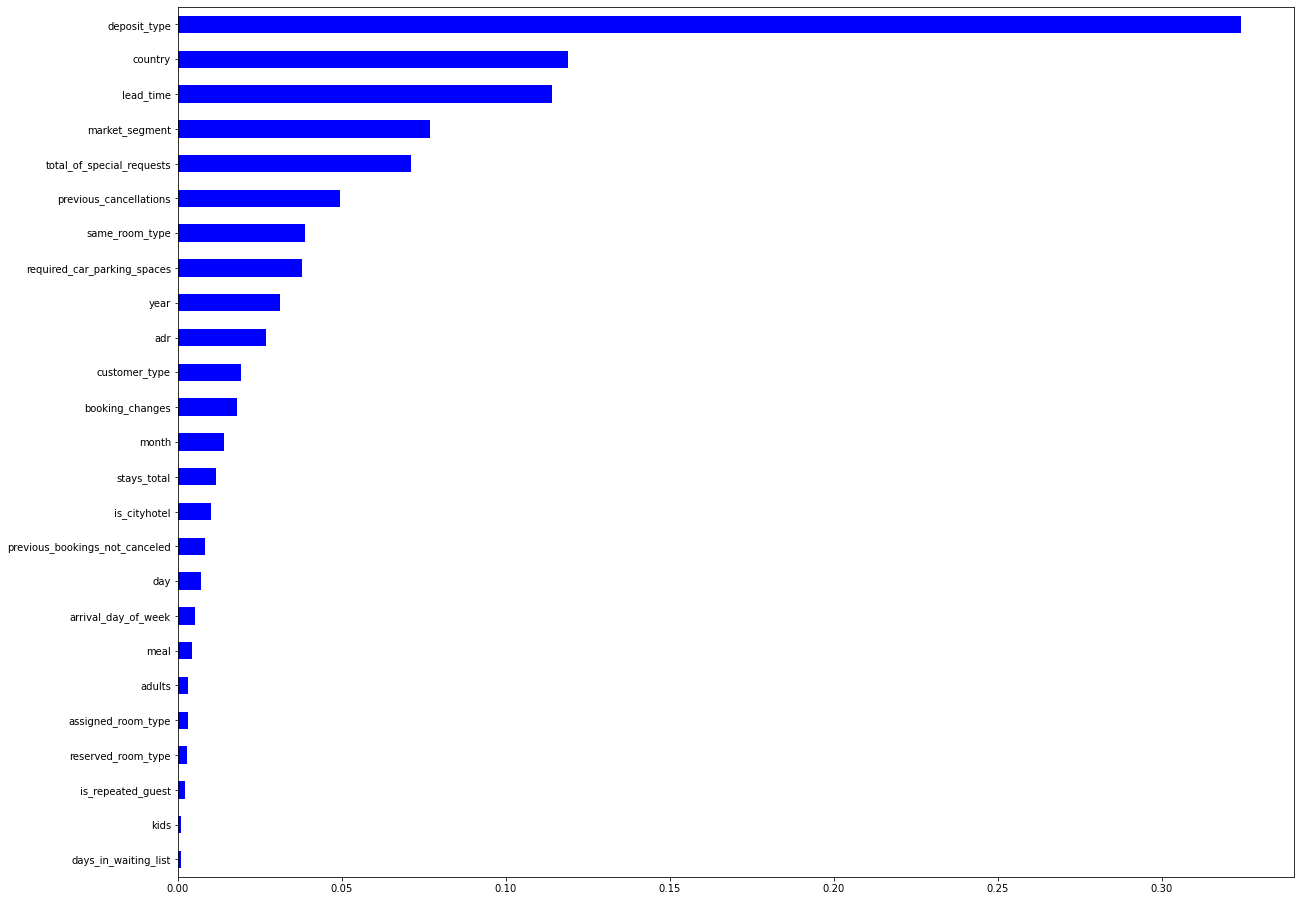

In [150]:
# Create a pd.Series of features importances
importances_gb = pd.Series(gb.feature_importances_,
index = X.columns)
# Sort importances_gb
sorted_importances_gb = importances_gb.sort_values()
# Make a horizontal bar plot
sorted_importances_gb.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

In [151]:
# another way of ploting feature importance
gb_feature_importances = pd.DataFrame(list(zip(train_X.columns.values, gb.feature_importances_)),
                                       columns =['Feafure', 'Importance'])
gb_feature_importances=gb_feature_importances.sort_values(by=['Importance'], ascending=False)

In [152]:
gb_feature_importances

,Feafure,Importance
13,deposit_type,0.324164
5,country,0.119052
0,lead_time,0.114035
6,market_segment,0.076958
18,total_of_special_requests,0.070998
8,previous_cancellations,0.049424
22,same_room_type,0.038899
17,required_car_parking_spaces,0.037750
1,year,0.031155
16,adr,0.026901


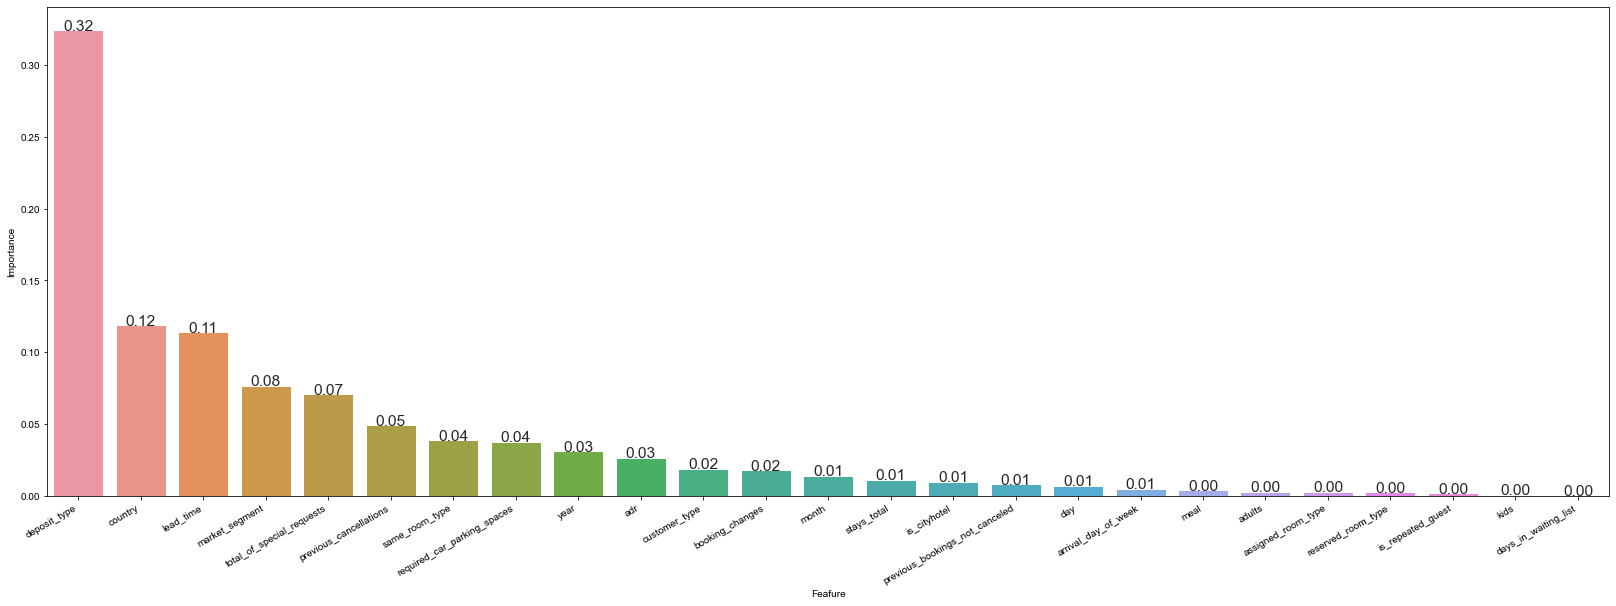

In [153]:
# method 2 of plotting feature importance. This only acts as an alternative to put on the presentation slides
fig, ax = plt.subplots()
fig.set_size_inches(28, 10)
sns.set(font_scale = 1.3)
gbfi = sns.barplot(x="Feafure", y="Importance", data=gb_feature_importances)
fig.autofmt_xdate()

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(gbfi)

### XG Boost

XGBoost, also known as extreme gradient boosting, dominates structured or tabular datasets on classification problems and is a broadly used algorithm for data science project. To help us identify the best parameters for the model, we used the RandomizedSearchCV funciton to help us pick the best comination of 'subsample', 'min_child_weight', 'max_depth', 'gamma', and 'colsample_bytree' among the lists of values we've chosen. We used the RandomizedSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the lastest RandomizedSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [154]:
# Gamma, the larger the more conervative
gamma = [0.01,0.1,0.5,1,2,3,5,10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

# Minimum sum of instance weight (hessian) needed in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, num = 10)]

# Subsample ratio of the training instances.
subsample = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Subsample ratio of columns when constructing each tree
colsample_bytree = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the XGB grid
xgb_grid = {'gamma': gamma,
            'max_depth': max_depth,
            'min_child_weight': min_child_weight,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree}

# Use the XGB grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier()

# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_grid, n_iter = 100, cv = 5, verbose=0,scoring='accuracy', random_state=SEED, n_jobs = -1)

# Fit the random search model
xgb_random.fit(train_X, train_y)

[08:56:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2,
                                                             0.30000

In [155]:
xgb_random.best_params_

{'subsample': 1.0,
 'min_child_weight': 6,
 'max_depth': 8,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [156]:
#Fit XGB Classifer
xgb = XGBClassifier(gamma=3, max_depth=8, min_child_weight=1, subsample=0.9, colsample_bytree=1.0, random_state=SEED)
#xgb = XGBClassifier()
xgb.fit(train_X,train_y)

[08:56:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred_xgb = xgb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred_xgb)
print("Test set accuracy of XGB: {:.5f}".format(acc))

Test set accuracy of XGB: 0.88062


In [158]:
# Predict the labels of the training set
y_pred_train_xgb = xgb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train_xgb)

# Print RMSE_train
print('Train set accuracy of XGB: {:.5f}'.format(acc_train))

Train set accuracy of XGB: 0.91462


In [159]:
Accuracy_CV_scores = cross_val_score(xgb, train_X, train_y, cv=5,
                                     scoring='accuracy',
                                     n_jobs=-1)

print(Accuracy_CV_scores)
print("XGB Accuracy score (CV): {0:.3f}".format(Accuracy_CV_scores.mean()))

[0.88036794 0.87636669 0.87599874 0.87552565 0.87873213]
XGB Accuracy score (CV): 0.877


In [160]:
# print confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, y_pred_xgb)
cnf_matrix

array([[13668,  1153],
       [ 1686,  7274]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

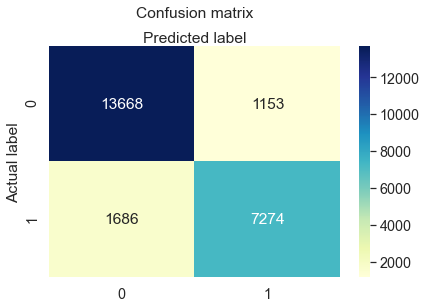

In [161]:
# plot confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_xgb))
print("Precision:",metrics.precision_score(test_y, y_pred_xgb))
print("Recall:",metrics.recall_score(test_y, y_pred_xgb))

Accuracy: 0.8806189815398848
Precision: 0.8631778806218109
Recall: 0.8118303571428571


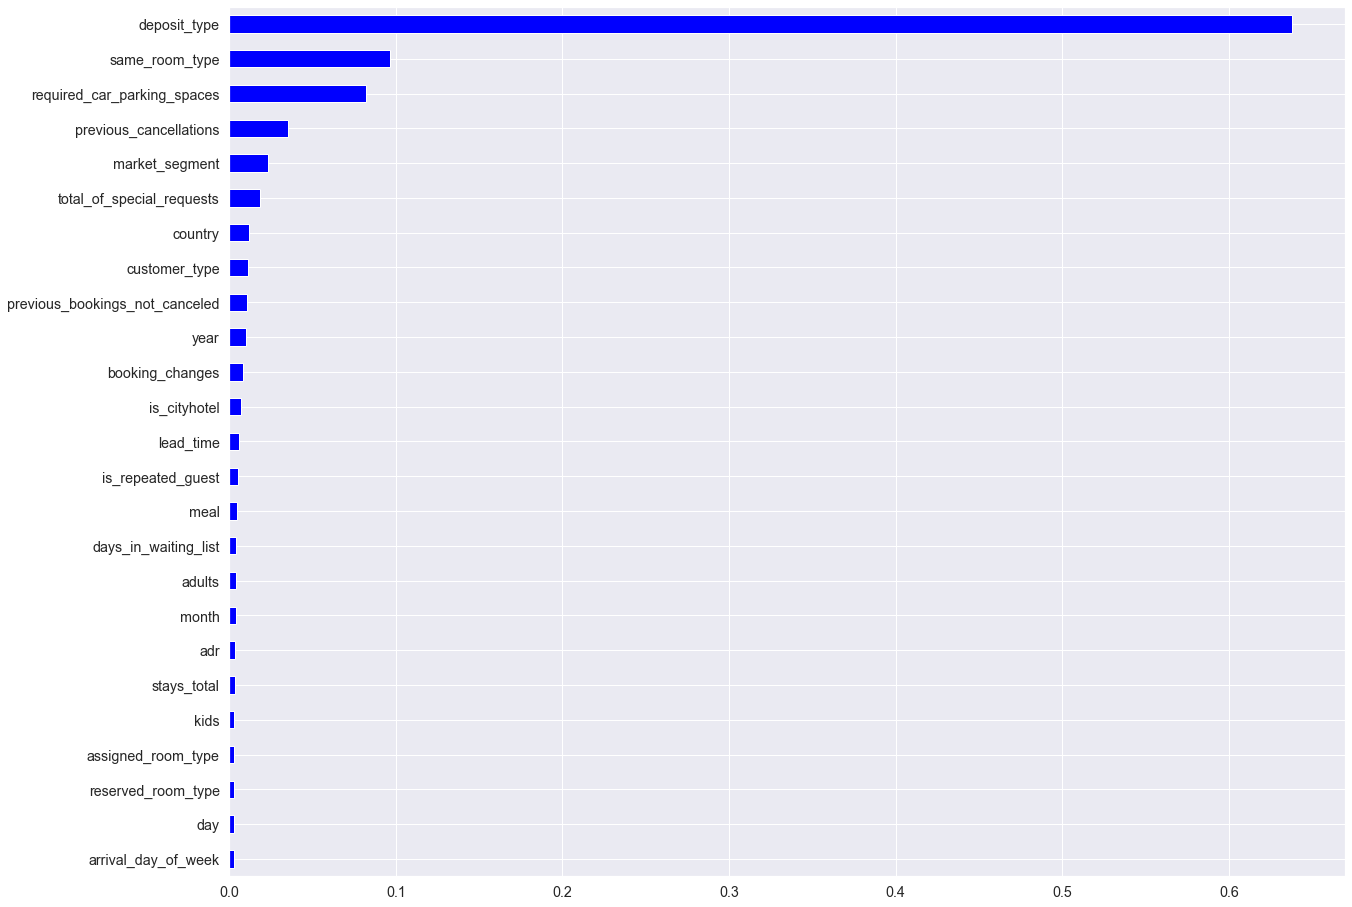

In [163]:
# Create a pd.Series of features importances
importances_xgb = pd.Series(xgb.feature_importances_,
index = X.columns)
# Sort importances_xgb
sorted_importances_xgb = importances_xgb.sort_values()
# Make a horizontal bar plot
sorted_importances_xgb.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

In [164]:
# another way of finding feature importance
xgb_feature_importances = pd.DataFrame(list(zip(train_X.columns.values,xgb.feature_importances_)),
                                       columns =['Feafure', 'Importance'])
xgb_feature_importances=xgb_feature_importances.sort_values(by=['Importance'], ascending=False)

In [165]:
xgb_feature_importances

,Feafure,Importance
13,deposit_type,0.637900
22,same_room_type,0.096422
17,required_car_parking_spaces,0.081975
8,previous_cancellations,0.035162
6,market_segment,0.023077
18,total_of_special_requests,0.018214
5,country,0.011611
15,customer_type,0.011334
9,previous_bookings_not_canceled,0.010417
1,year,0.010160


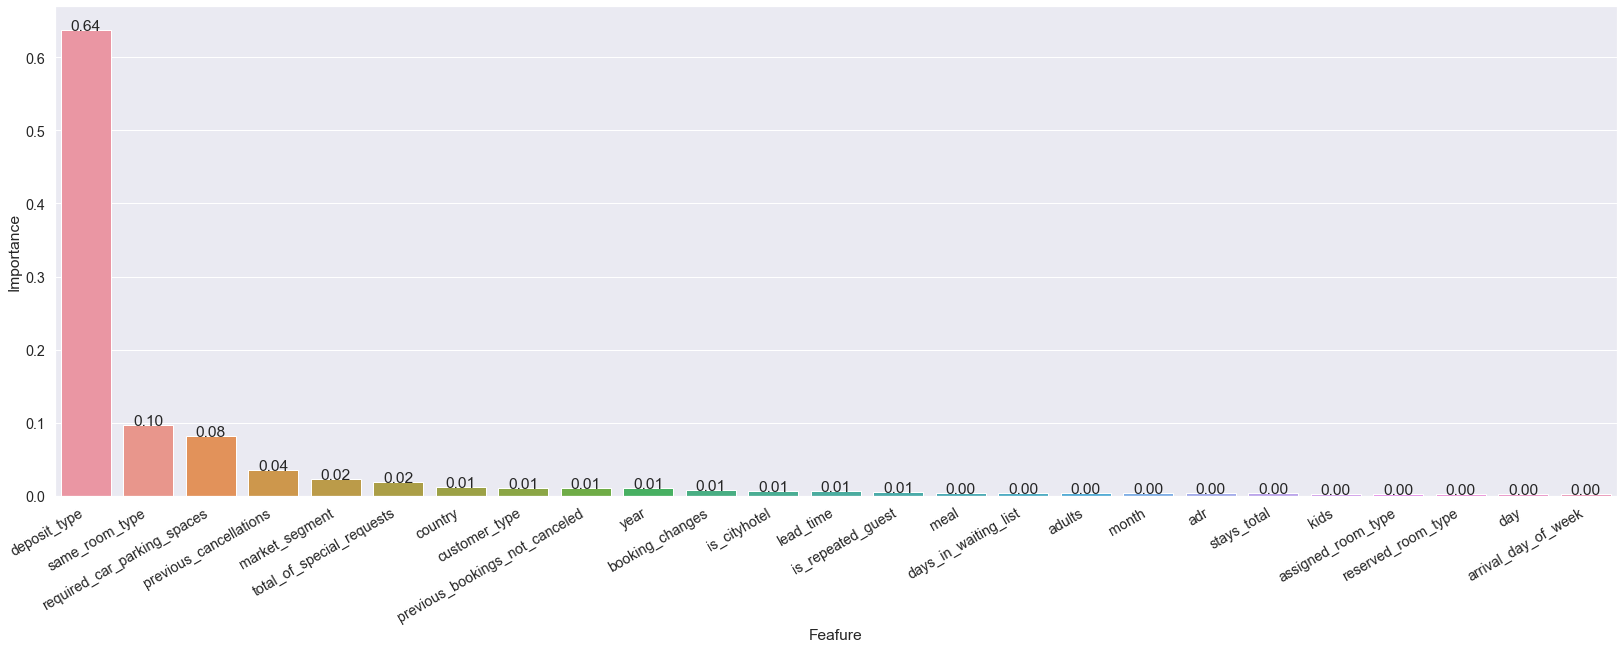

In [166]:
# method 2 of plotting feature importance. This only acts as an alternative to put on the presentation slides
fig, ax = plt.subplots()
fig.set_size_inches(28, 10)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Feafure", y="Importance", data=xgb_feature_importances)
fig.autofmt_xdate()

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

#### Voting Classifier

Finally, we ran an emsemble learning to get the best results. In our case, we used voting classifier to ensemble 4 models (excluding logistic regression and random forest due to their limitations) and use it to predict the canellation. As we can see, the hard voting classifer yields a result of 87.4% accuracy while the soft voting classifer yields a resutl of 87.5%. Both are better than most individual models along. To check for overfitting or underfitting issues, we also ran the voting classifier on the train data set and ran cross validation. Since the test, train and cross validation accuracy all around 87-88%, there's no sign of overfitting or underfitting in our model. 

Other than Accuracy, the voting classifier also yields good precision and recall scores. Precision which is stating that the of the cancelations the model predicted, 88% of them actually cancelled. Recall which is stating that model is 75% sensitive to predict cancellations from guests who actually cancelled. 


In [167]:
#conda install -c anaconda py-xgboost

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np



# Set seed for reproducibility
SEED=1

# Logitstic Regression
logReg=LogisticRegression(solver='lbfgs', max_iter=4000)

# KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Define the list classifiers
classifiers = [#('Logistics Regression', logReg),
               ('CatBoost', model_cb),
               ('Classification Tree', dt), 
               #('Random Forest',rf),
               ('Gradient Boost', gb), 
               ('XGBoost', xgb)]

In [182]:
# Import accuracy_score
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(train_X, train_y)    
  
    # Predict y_pred
    y_pred = clf.predict(test_X)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_y, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Learning rate set to 0.072054
0:	learn: 0.6320563	total: 20.7ms	remaining: 20.7s
1:	learn: 0.5856025	total: 41.8ms	remaining: 20.9s
2:	learn: 0.5504108	total: 58.7ms	remaining: 19.5s
3:	learn: 0.5146995	total: 74.3ms	remaining: 18.5s
4:	learn: 0.4924844	total: 90ms	remaining: 17.9s
5:	learn: 0.4697254	total: 105ms	remaining: 17.4s
6:	learn: 0.4540328	total: 120ms	remaining: 17s
7:	learn: 0.4406437	total: 135ms	remaining: 16.7s
8:	learn: 0.4319907	total: 150ms	remaining: 16.5s
9:	learn: 0.4231036	total: 165ms	remaining: 16.3s
10:	learn: 0.4147825	total: 181ms	remaining: 16.3s
11:	learn: 0.4085145	total: 201ms	remaining: 16.5s
12:	learn: 0.4021278	total: 219ms	remaining: 16.7s
13:	learn: 0.3972557	total: 235ms	remaining: 16.5s
14:	learn: 0.3922168	total: 250ms	remaining: 16.4s
15:	learn: 0.3884865	total: 265ms	remaining: 16.3s
16:	learn: 0.3838608	total: 280ms	remaining: 16.2s
17:	learn: 0.3793035	total: 296ms	remaining: 16.2s
18:	learn: 0.3767726	total: 311ms	remaining: 16.1s
19:	learn:

In [183]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='hard')     

# Fit vc to the training set
vc.fit(train_X, train_y)   

# Evaluate the test set predictions
y_pred = vc.predict(test_X)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred)


Learning rate set to 0.072054
0:	learn: 0.6320563	total: 19.7ms	remaining: 19.7s
1:	learn: 0.5856025	total: 40ms	remaining: 20s
2:	learn: 0.5504108	total: 61.1ms	remaining: 20.3s
3:	learn: 0.5146995	total: 79.9ms	remaining: 19.9s
4:	learn: 0.4924844	total: 96.3ms	remaining: 19.2s
5:	learn: 0.4697254	total: 111ms	remaining: 18.4s
6:	learn: 0.4540328	total: 126ms	remaining: 17.8s
7:	learn: 0.4406437	total: 141ms	remaining: 17.5s
8:	learn: 0.4319907	total: 156ms	remaining: 17.2s
9:	learn: 0.4231036	total: 173ms	remaining: 17.1s
10:	learn: 0.4147825	total: 188ms	remaining: 16.9s
11:	learn: 0.4085145	total: 208ms	remaining: 17.1s
12:	learn: 0.4021278	total: 229ms	remaining: 17.4s
13:	learn: 0.3972557	total: 245ms	remaining: 17.3s
14:	learn: 0.3922168	total: 261ms	remaining: 17.1s
15:	learn: 0.3884865	total: 276ms	remaining: 17s
16:	learn: 0.3838608	total: 291ms	remaining: 16.8s
17:	learn: 0.3793035	total: 307ms	remaining: 16.7s
18:	learn: 0.3767726	total: 322ms	remaining: 16.6s
19:	learn: 0

In [184]:
print('Hard Voting Classifier: {:.3f}'.format(accuracy))

Hard Voting Classifier: 0.872


In [185]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='soft')     

# Fit vc to the training set
vc.fit(train_X, train_y)   

# Evaluate the test set predictions
y_pred = vc.predict(test_X)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred)


Learning rate set to 0.072054
0:	learn: 0.6320563	total: 21.4ms	remaining: 21.4s
1:	learn: 0.5856025	total: 39ms	remaining: 19.5s
2:	learn: 0.5504108	total: 55.1ms	remaining: 18.3s
3:	learn: 0.5146995	total: 70.8ms	remaining: 17.6s
4:	learn: 0.4924844	total: 86.5ms	remaining: 17.2s
5:	learn: 0.4697254	total: 102ms	remaining: 16.8s
6:	learn: 0.4540328	total: 117ms	remaining: 16.5s
7:	learn: 0.4406437	total: 132ms	remaining: 16.3s
8:	learn: 0.4319907	total: 146ms	remaining: 16.1s
9:	learn: 0.4231036	total: 162ms	remaining: 16.1s
10:	learn: 0.4147825	total: 178ms	remaining: 16s
11:	learn: 0.4085145	total: 194ms	remaining: 16s
12:	learn: 0.4021278	total: 214ms	remaining: 16.2s
13:	learn: 0.3972557	total: 232ms	remaining: 16.3s
14:	learn: 0.3922168	total: 250ms	remaining: 16.4s
15:	learn: 0.3884865	total: 265ms	remaining: 16.3s
16:	learn: 0.3838608	total: 280ms	remaining: 16.2s
17:	learn: 0.3793035	total: 298ms	remaining: 16.3s
18:	learn: 0.3767726	total: 313ms	remaining: 16.2s
19:	learn: 0

In [186]:
print('Soft Voting Classifier: {:.3f}'.format(accuracy))

Soft Voting Classifier: 0.876


In [187]:
# Predict the labels of the training set
y_pred_train = vc.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of dt: {:.2f}'.format(acc_train))

Train set accuracy of dt: 0.89


In [188]:
import warnings
warnings.filterwarnings("ignore")
cv_results = cross_validate(vc, train_X, train_y, cv=5)
cv_results['test_score']

Learning rate set to 0.065505
0:	learn: 0.6368837	total: 19.3ms	remaining: 19.3s
1:	learn: 0.5932245	total: 34.7ms	remaining: 17.3s
2:	learn: 0.5585135	total: 49.1ms	remaining: 16.3s
3:	learn: 0.5244225	total: 63.1ms	remaining: 15.7s
4:	learn: 0.5024378	total: 83.4ms	remaining: 16.6s
5:	learn: 0.4800259	total: 102ms	remaining: 16.9s
6:	learn: 0.4634408	total: 119ms	remaining: 16.8s
7:	learn: 0.4499891	total: 132ms	remaining: 16.4s
8:	learn: 0.4410185	total: 146ms	remaining: 16.1s
9:	learn: 0.4313050	total: 160ms	remaining: 15.9s
10:	learn: 0.4231698	total: 174ms	remaining: 15.7s
11:	learn: 0.4160902	total: 193ms	remaining: 15.9s
12:	learn: 0.4093593	total: 211ms	remaining: 16s
13:	learn: 0.4026993	total: 225ms	remaining: 15.8s
14:	learn: 0.3973888	total: 239ms	remaining: 15.7s
15:	learn: 0.3934449	total: 253ms	remaining: 15.5s
16:	learn: 0.3896576	total: 267ms	remaining: 15.4s
17:	learn: 0.3858566	total: 281ms	remaining: 15.3s
18:	learn: 0.3830154	total: 295ms	remaining: 15.2s
19:	lear

array([0.87358739, 0.87063709, 0.87216148, 0.87321278, 0.87615643])

In [189]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.87'

In [190]:
# print confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13748,  1073],
       [ 1864,  7096]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

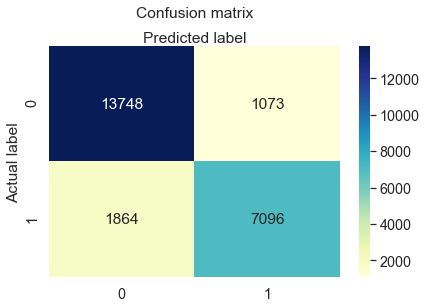

In [191]:
# plot confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [192]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8764980446574997
Precision: 0.8686497735340923
Recall: 0.7919642857142857


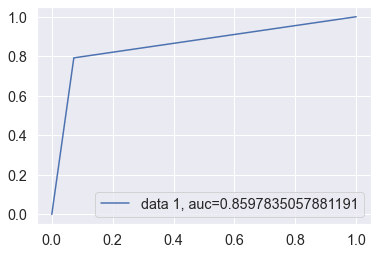

In [193]:
# plot ROC curve with AUC score
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()